### Imports

In [ ]:
from sklearn import datasets 
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split

## 1.Binairy Classification

In [ ]:
#Creating dataset
X,Y= datasets.make_circles(n_samples=1000, shuffle=True, noise=0.03, random_state=42, factor=0.7)

print("les dimensions du dataset : ",X.shape , Y.shape)
print("les 5 premieres instances de x ")
print(X[:5])
print("les 5 premieres instances de y ",Y[:5] )


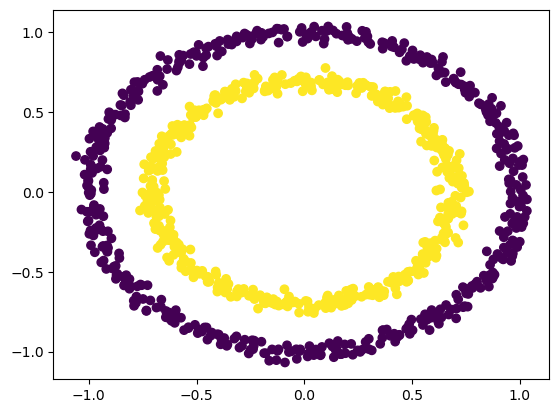

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [7]:
print("Number of instances in every class:",X[:, 0][Y == 0].size)

Number of instances in every class: 500


In [8]:
#Converting NumPy arrays to PyTorch tensors
X = torch . from_numpy (X) . type ( torch . float )
Y = torch . from_numpy (Y) . type ( torch . float )


 X tensor representing the input data for a batch, it typically has multiple dimensions, such as (batch_size, input_features)

##### Why tensors ?
Tensors are essential in deep learning because they provide a structured way to represent and manipulate data. They support mathematical operations crucial for neural networks, enable automatic differentiation for training, allow for GPU acceleration, ensure consistent data type handling, and are the preferred data structure in deep learning libraries like PyTorch and TensorFlow. 

In [19]:
#Prepare training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

### Defining the Model

In [20]:
#Determining the execution device (CPU or GPU) available on the system.
from torch import nn
device = " cuda " if torch.cuda.is_available () else "cpu"


 CUDA is a parallel computing platform and application programming interface (API) model created by NVIDIA, and it is required for GPU acceleration with PyTorch

In [16]:
#Define our model 
class ModelV0(nn.Module):
    def __init__ ( self ) :
        super(). __init__ ()
        
        self.layer_1= nn.Linear( in_features= 2, out_features= 5)
        self.layer_2= nn.Linear( in_features= 5, out_features= 1)

    # Propagation 
    def forward( self, x):
        return self.layer_2(self.layer_1(x))

We've added Batch normalization to stabilize and accelerate the training process. It normalizes the input of each layer in the network, helping with internal covariate shift.

In [17]:
model_0 = ModelV0 () . to ( device )
print(model_0)

ModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


to(device): This part sends the model to a specific device for execution, where device is either "cuda" (GPU) or "cpu" (CPU). This is important for utilizing hardware acceleration. If a GPU is available (device = "cuda"), the model and its parameters will be transferred to the GPU memory, enabling faster computations. If no GPU is available, it will default to CPU execution.

In [18]:
#Definition of the Loss Function and the optimizer :
loss_fn = nn.BCEWithLogitsLoss ()
optimizer = torch.optim.SGD( params=model_0.parameters() ,lr=0.001, weight_decay=1e-4)

BCEWithLogitsLoss: loss function often used for binary classification tasks where the model's output is passed through a sigmoid function.

the SGD optimizer with a learning rate of 0.1 : to update the model's weights during training

#### Loss function
Measures the difference between the predicted values of a model and the true values (ground truth) in the training dataset
During the training process, the model's parameters (weights and biases) are adjusted iteratively to minimize the value of the loss function

#### Accuracy
Accuracy a performance metric that measures the proportion of correctly classified instances out of the total instances.

### Training the model

In [15]:
def accuracy_fn(y_true, y_pred):
   
    correct= torch.eq(y_true,y_pred).sum()
    accuracy= (correct/len(y_true))*100
    return accuracy


#### Gradient 
Gradients guide the optimization process, allowing the model to iteratively adjust its parameters to minimize the difference between predictions and true values

Update Rule: Once the gradients are computed, the optimizer adjusts the model's parameters using an update rule

new parameter =old parameter − learning rate × gradient



In [26]:
torch . manual_seed (42)

epochs = 100
    
# Initialise  loss and accuracy
total_loss = 0.0
total_correct = 0

# Send dataset to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range ( epochs ):
        model_0 . train ()
    
        
       # Logits are the output of the model's final linear layer, which is typically followed by an activation function
        y_logits = model_0 ( X_train ). squeeze ()
    
       # Apply sigmoid activation and rounds to obtain binary predictions.
        y_pred = torch . round ( torch . sigmoid ( y_logits ))
        

        loss = loss_fn (   y_logits, y_train   )
        acc = accuracy_fn ( y_true = y_train , y_pred = y_pred )
    
       # Backward Pass and Parameter Update
        loss.backward()
        optimizer.step()

       #Zero the Gradients :necessary in each iteration to avoid accumulating gradients from previous iterations.
        optimizer . zero_grad ()
        
        model_0 . eval ()
        with torch . inference_mode () :
            test_logits = model_0 ( X_test ) . squeeze ()
            test_pred = torch . round ( torch . sigmoid ( test_logits ))

            test_loss = loss_fn ( test_logits , y_test )
            test_acc = accuracy_fn ( y_true = y_test , y_pred = test_pred )
           
       # Display progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}:')
            print ('test loss:',test_loss, '  and ','test accuracy :',test_acc)
        
        
    

Epoch 10:
test loss: tensor(0.6972)   and  test accuracy : tensor(50.)
Epoch 20:
test loss: tensor(0.6972)   and  test accuracy : tensor(50.)
Epoch 30:
test loss: tensor(0.6971)   and  test accuracy : tensor(50.)
Epoch 40:
test loss: tensor(0.6971)   and  test accuracy : tensor(50.)
Epoch 50:
test loss: tensor(0.6971)   and  test accuracy : tensor(50.)
Epoch 60:
test loss: tensor(0.6971)   and  test accuracy : tensor(50.)
Epoch 70:
test loss: tensor(0.6971)   and  test accuracy : tensor(50.)
Epoch 80:
test loss: tensor(0.6971)   and  test accuracy : tensor(50.)
Epoch 90:
test loss: tensor(0.6970)   and  test accuracy : tensor(50.)
Epoch 100:
test loss: tensor(0.6970)   and  test accuracy : tensor(50.)


 We notice that the accuracy is approximately 50%, which means that the model is underfitting and needs more training . In order to enhance the understanding of the complexity, we must increment of hidden layers and neurons hence extracting more features

## 2.Multi-Class Classification 

In [27]:
from sklearn.datasets import make_blobs

# Set the parameters
n_samples = 1000
n_features = 2
n_classes = 4

# Generate the data
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes)

In [28]:
import torch

# Transform the data into tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

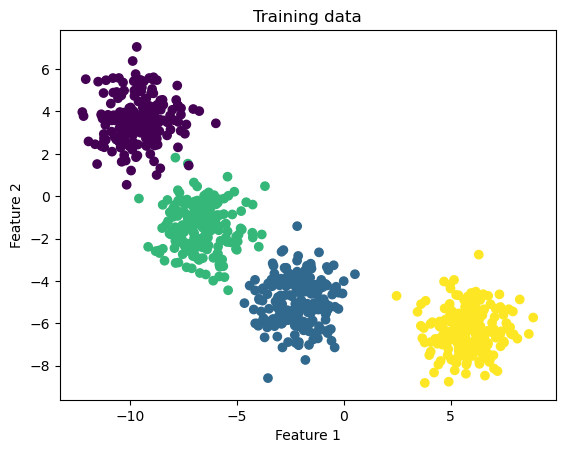

In [30]:

# Visualize the data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Training data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [31]:
import torch.nn as nn

# Define the FCNN architecture
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 4)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# Initialize the model
model = FCNN()

In [32]:
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluate the model
    if epoch % 10 == 0:
        train_preds = torch.argmax(outputs, dim=1)
        train_acc = accuracy_score(y_train, train_preds)
        test_preds = torch.argmax(model(X_test), dim=1)
        test_acc = accuracy_score(y_test, test_preds)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch [1/100], Loss: 1.3823, Train Acc: 0.2537, Test Acc: 0.2100
Epoch [11/100], Loss: 1.2415, Train Acc: 0.7450, Test Acc: 0.7150
Epoch [21/100], Loss: 1.0819, Train Acc: 0.7412, Test Acc: 0.7100
Epoch [31/100], Loss: 1.0136, Train Acc: 0.8213, Test Acc: 0.8200
Epoch [41/100], Loss: 0.9310, Train Acc: 0.9838, Test Acc: 0.9750
Epoch [51/100], Loss: 0.8618, Train Acc: 0.9888, Test Acc: 0.9750
Epoch [61/100], Loss: 0.8218, Train Acc: 0.9925, Test Acc: 0.9800
Epoch [71/100], Loss: 0.8004, Train Acc: 0.9925, Test Acc: 0.9800
Epoch [81/100], Loss: 0.7878, Train Acc: 0.9912, Test Acc: 0.9800
Epoch [91/100], Loss: 0.7802, Train Acc: 0.9925, Test Acc: 0.9900


In [34]:
def plot_decision_boundary(model, X, y):
    # Create a mesh grid for the plot
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Get the model's predictions for the mesh grid
    X_grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()]).float().to(device)
    y_pred = torch.argmax(torch.softmax(model(X_grid), dim=1), axis=1)
    y_pred = y_pred.cpu().numpy().reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contour(xx, yy, y_pred, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.show()

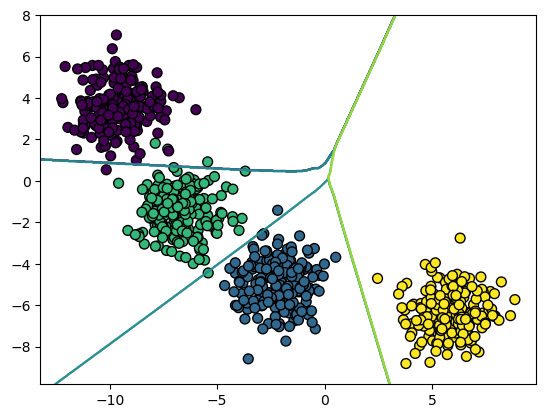

In [35]:
# Plot the decision boundaries for the training set
plot_decision_boundary(model, X_train.cpu().numpy(), y_train.cpu().numpy())

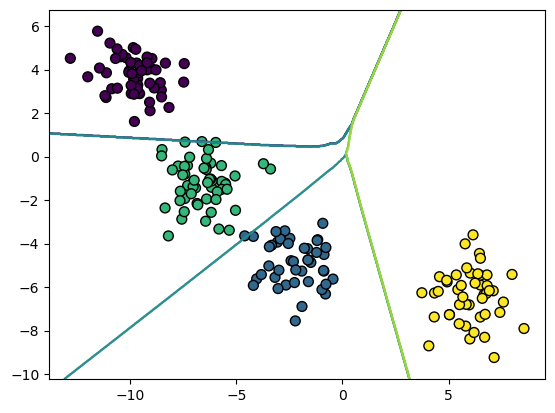

In [36]:
# Plot the decision boundaries for the test set
plot_decision_boundary(model, X_test.cpu().numpy(), y_test.cpu().numpy())